### 01. 파이토치를 이용한 텍스트 분류
- 파이토치로 인공 신경망을 이용한 텍스트 분류 실습
- 실습에 앞서 딥러닝을 이용해서 텍스트 분류가 수행될 때, 어떤 작업과 구성으로 진행되는지 공부

#### 1. 훈련 데이터에 대한 이해

- 앞으로 공부하는 텍스트 분류 작업은 지도 학습(Supervised Learning)에 속한다.
- 지도 학습의 훈련 데이터는 레이블이라는 이름의 미리 정답이 적혀있는 데이터로 구성되어 있다.
    - 기계는 정답이 적혀져 있는 문제지를 열심히 공부하고, 정답이 없는 문제에 대해서도 정답을 예측해서 대답하게 되는 매커니즘
- 예를 들어
    - 스팸 메일 분류기의 훈련 데이터같은 경우에는 메일의 내용과 해당 메일이 정상 메일인지, 스팸 메일인지 적혀 있는 레이블로 구성되어 있다.
    - 아래와 같은 형식의 메일 샘플이 약 20000개 있다고 가정

In [5]:
from IPython.display import Image

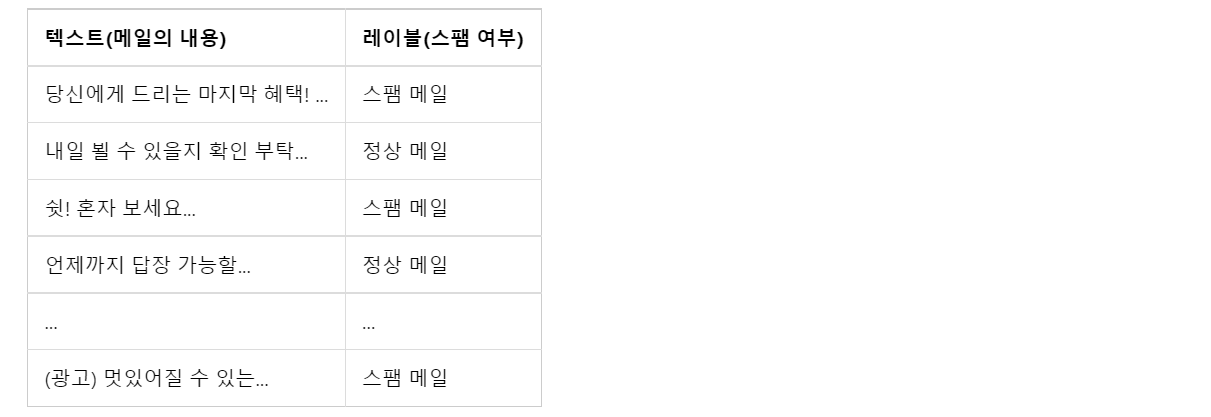

In [7]:
Image("12-01-02.PNG")

- 20000개의 메일 샘플을 가진 이 데이터는 메일의 내용을 담고 있는 텍스트 데이터 + 이 데이터가 스팸 메일인지 아닌지가 적혀있는 레이블(즉, 두가지 열로 이루어져 있다.)
- 기계는 이 20,000개의 메일 샘플 데이터를 학습하게 된다.
- 만약, 데이터가 깔끔하고 모델 또한 잘 설계되어져 있다면 학습이 다 된 이 모델은 훈련 데이터에서는 없었던 어떤 메일 텍스트가 주어졌을 때 레이블을 예츨하게 된다.

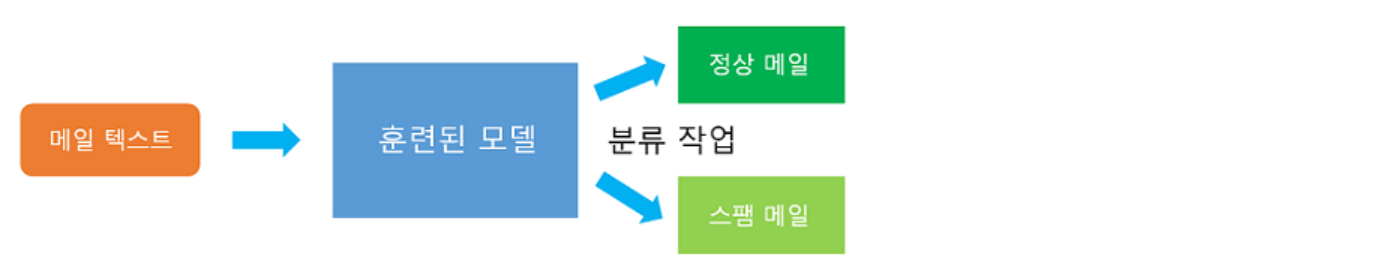

In [9]:
Image("12-01-01.PNG")

----------------------------------------------------------------------------------------------------------

#### 2. 훈련 데이터와 테스트 데이터

- 위에서는 20,000개의 메일 샘플을 전부 훈련에 사용했다고 했지만, 갖고 있는 전체 데이터를 전부 훈련에 사용하는 것보다는 테스트용으로 일부는 남겨놓는 것이 바람직하다.
    - 예를 들어, 20,000개의 샘플 중에서 18,000개의 샘플은 훈련용으로 / 2,000개의 샘플은 테스트용으로 보류한 채 이 샘플들은 훈련을 시킬 때는 사용하지 않을 수 있다.
    - 그 후, 18,000개의 샘플로 모델이 훈련이 다 되면, 냅두었던 2000개의 테스트용 샘플에서 레이블을 보여주지 않고 모델에게 맞춰보라고 요구한 뒤, 정확도를 확인
    - 2,000개의 샘플에도 레이블이 있으므로 모델이 실제로 정답을 얼마나 맞추는지 정답률을 계산하게 된다.

- 변수 정의
    - X : 데이터에서 분류하고자 하는 텍스트 데이터의 열
    - y : 레이블 데이터의 열
    - 이를 훈련 데이터(X_train, y_train)와 테스트 데이터(X_test, y_test)로 분리한다.
    - 모델은 X_train, y_train을 학습하고 X_test에 대해서 레이블을 예측한다.
    - 그 후, 모델이 예측한 레이블과 y_test를 비교해서 정답률을 계산한다.

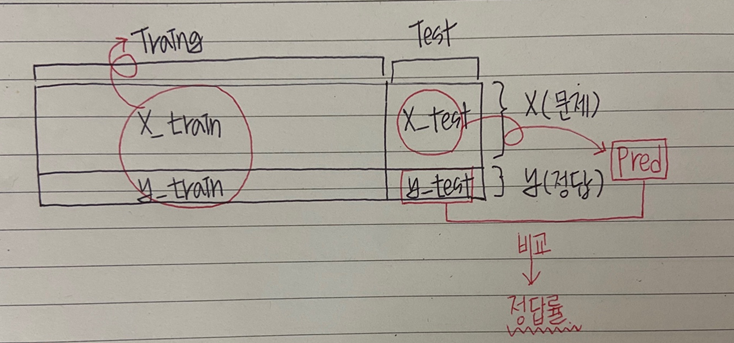

In [11]:
Image("12-01-03.PNG")

----------------------------------------------------------------------------------------------------------

#### 3. 단어에 대한 인덱스 부여

- 앞서 워드 임베딩 부분에서 **단어** 를 **밀집 벡터(dense vector)** 로 바꾸는 **워드 임베딩** 에 대해서 공부함 !
- 파이토치의 **nn.Embeddiing()** 은 단어 각각에 대해 정수가 맵핑된 입력에 대해서 임베딩 작업을 수행할 수 있게 해준다.

- 단어 각각에 숫자 맵핑, 인덱스를 부여하는 방법
    - 정수 인코딩 챕터에서와 같이, **단어를 빈도순 순대로 정렬하고 순차적으로 인덱스**를 부여
    - EX) 로이터 뉴스 분류하기, IMDB 리뷰 감성 분류하기 등

- 위의 방법의 장점 : **등장 빈도수가 적은 단어의 제거**
- 예를 들어
    - 25000개의 단어가 있다고 가정
    - 해당 단어를 등장 빈도수가 높은 순서로 1부터 25000까지 인덱스를 부여(등장 빈도수 순대로 등수가 부여된 것과 같다.)
    - 전처리 작업에서 1000을 넘는 인덱스를 가진 단어들을 제거시켜버리면 등장 빈도수 상위1000개의 단어만 남길 수 있다.

----------------------------------------------------------------------------------------------------------

#### 4. RNN으로 분류하기

In [ ]:
# 실제 RNN 은닉층을 추가하는 코드
nn.RNN(input_size, hidden_size, batch_first=True)

- 텍스트 분류 관점에서 앞서 배운 RNN 코드의 timestep, input_dim, hidden_size를 해석
- 위의 코드에서는 바닐라 RNN을 사용했지만, RNN의 변형인 LSTM, GRU도 아래와 사항은 동일하다.
    - hidden_size = 출력의 크기(output_dim)
    - timesteps = 시점의 수 = **각 문서에서의 단어 수**
    - input_size = 입력의 크기 = 각 단어의 벡터 표현의 차원 수

----------------------------------------------------------------------------------------------------------

#### 5. RNN의 다대일(Many-to-One) 문제

- 텍스트 분류는 RNN의 다대일(many-to-one) 문제에 속한다.
- 즉, 텍스트 분류는 모든 시점(time step)에 대해서 입력을 받지만, 최종 시점의 RNN 셀만이 은닉 상태를 출력하고, 이것이 출력층으로 가서 활성화 함수를 통해 정답을 고르는 문제가 된다.

- 문제 분류
    - 이진 분류(Binary Classification) 문제 
        - 두 개의 선택지 중에서 정답을 고르는 문제
        - 활성화 함수(activation function) : 시그모이드
        - ex) 스팸 메일 분류하기, IMDB 리뷰 감성 분류하기
    - 다중 클래스 분류(Multi-Class Classification) 문제 
        - 세 개 이상의 선택지 중에서 정답을 고르는 문제
        - 활성화 함수 : 소프트맥스 함수
        - 클래스가 N개라면 출력층에 해당되는 밀집층(dense layer)의 크기 : N(즉, 출력층의 뉴런의 수는 N개)
        - 하지만 소프트맥스 함수로 이진 분류를 할 수 있다.(출력층에 뉴런을 2개로 배치)
        - ex) 로이트 뉴스 분류하기
    - 각각 문제에 맞는 활성화 함수와 손실 함수를 사용한다.